In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

data = pd.read_csv('D:\Институт\Семестр_6\ТМО_Гапанюк\лабы\states_all.csv', sep=",")
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [2]:
data.shape

(1715, 25)

In [3]:
data.dtypes # типы колонок

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [9]:
data.isnull().sum() # проверка на пропущенные значения

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

# Обработка пропусков в числовых данных

In [252]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
print('END')

Колонка ENROLL. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка TOTAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка FEDERAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка STATE_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка LOCAL_REVENUE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка TOTAL_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка INSTRUCTION_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка SUPPORT_SERVICES_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка OTHER_EXPENDITURE. Тип данных float64. Количество пустых значений 491, 28.63%.
Колонка CAPITAL_OUTLAY_EXPENDITURE. Тип данных float64. Количество пустых значений 440, 25.66%.
Колонка GRADES_PK_G. Тип данных float64. Количество пустых значений 173, 10.09%.
Колонка GRADES_KG_G. Тип данных float64. Количес

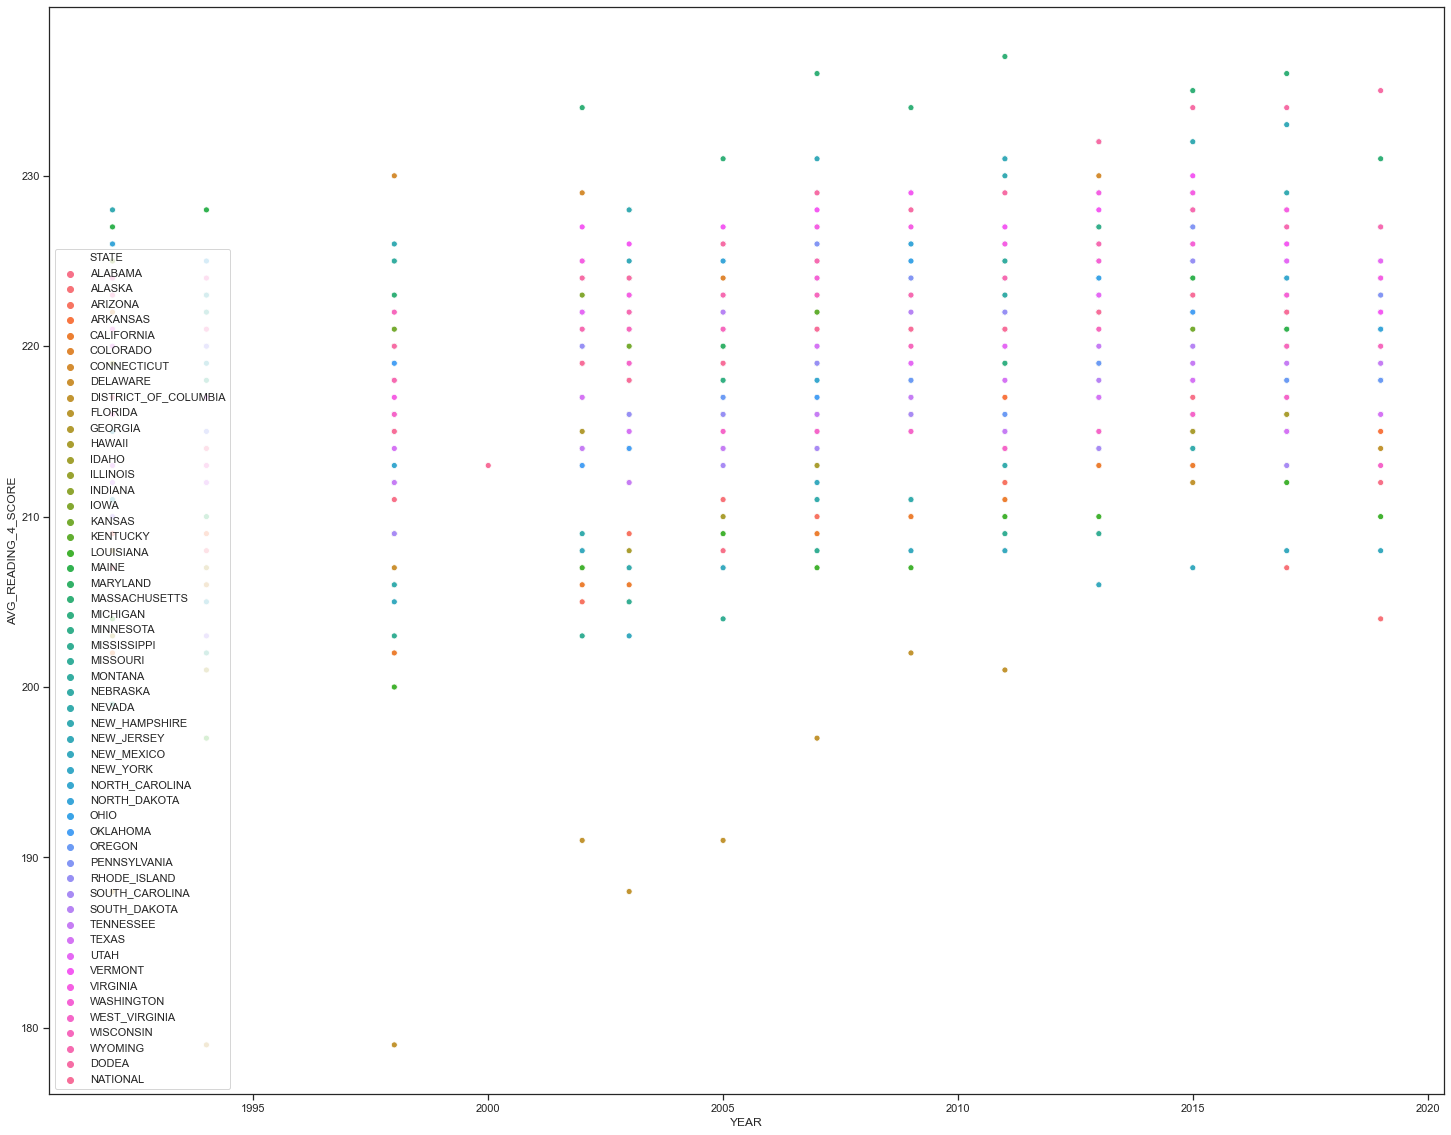

In [231]:
fig, ax = plt.subplots(figsize=(25,20)) 
sns.scatterplot(ax=ax, x='YEAR', y='AVG_READING_4_SCORE', data=data, hue='STATE')

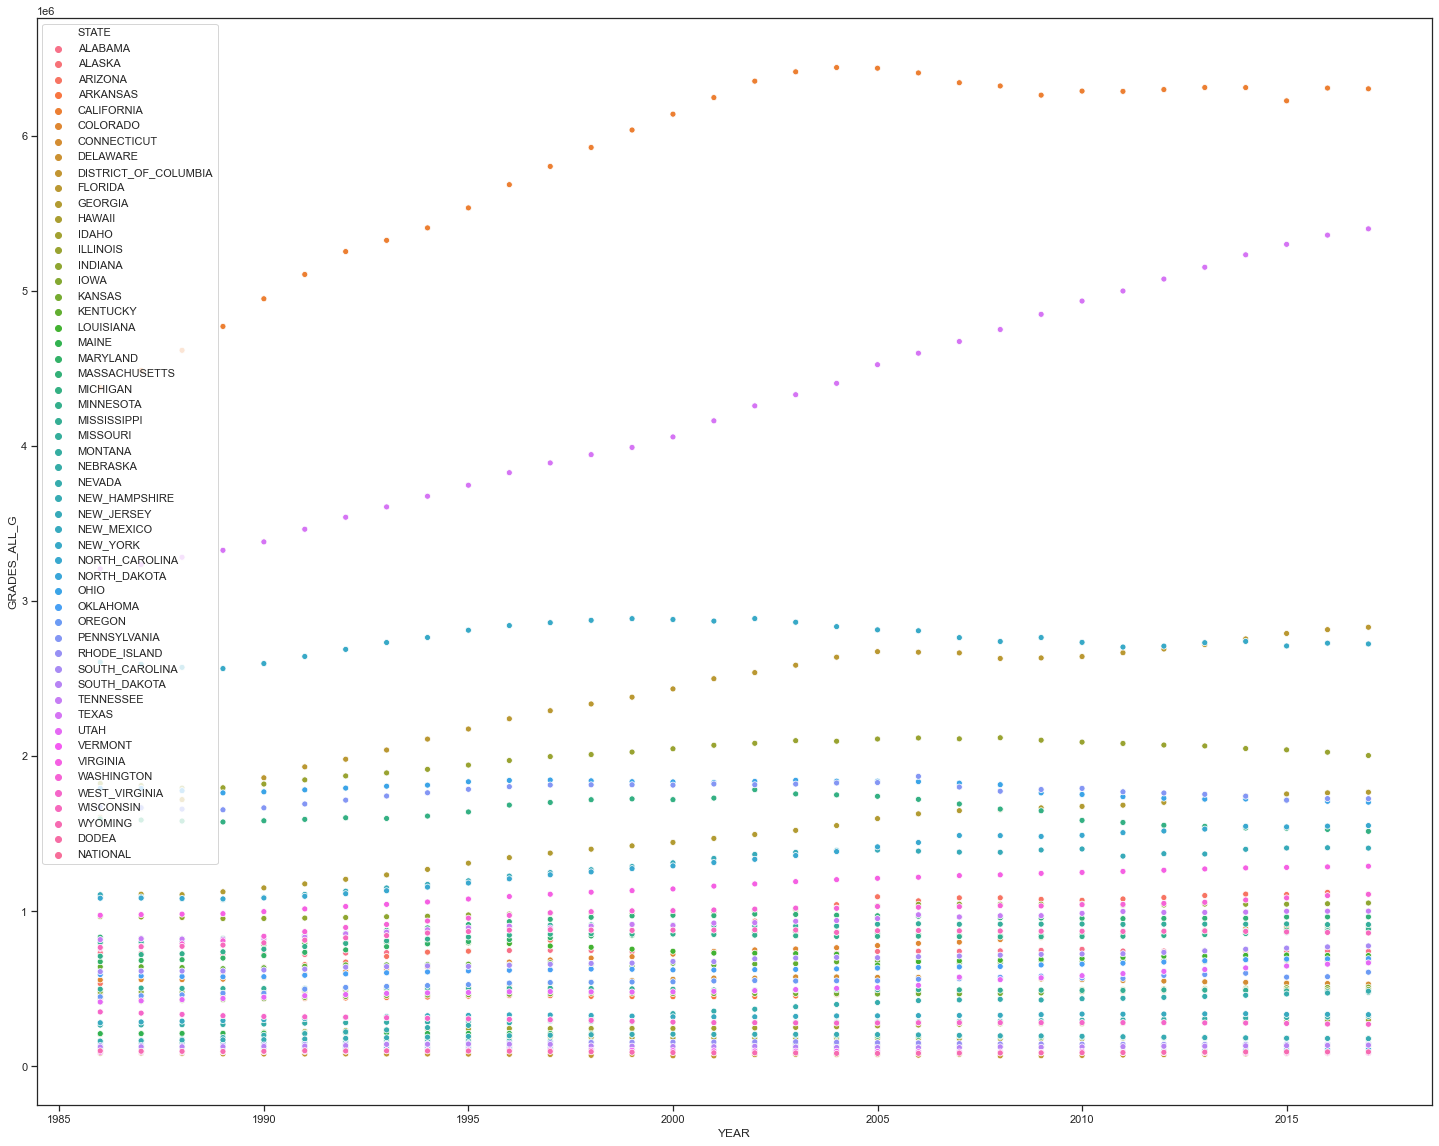

In [224]:
fig, ax = plt.subplots(figsize=(25,20)) 
sns.scatterplot(ax=ax, x='YEAR', y='GRADES_ALL_G', data=data, hue='STATE')

In [71]:
data_nul = data[data['GRADES_ALL_G'].isnull()] # Фильтр по пустым значениям поля GRADES_ALL_G 
data_nul

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
1632,1990_DODEA,DODEA,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1633,1990_NATIONAL,NATIONAL,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,213.0,263.0,NaN,NaN
1634,1992_DODEA,DODEA,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1635,1992_NATIONAL,NATIONAL,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,220.0,268.0,217.0,260.0
1636,1994_DODEA,DODEA,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [76]:
data_nul['GRADES_ALL_G'].unique()

array([nan])

In [187]:
dat_st = data_nul['STATE'].unique()
dat_st

array(['DODEA', 'NATIONAL', 'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS',
       'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE',
       'DISTRICT_OF_COLUMBIA', 'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO',
       'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA',
       'MAINE', 'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA',
       'MISSISSIPPI', 'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA',
       'NEW_HAMPSHIRE', 'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK',
       'NORTH_CAROLINA', 'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON',
       'PENNSYLVANIA', 'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA',
       'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [188]:
dat_st.shape[0]

53

In [217]:
for x in dat_st:
    data_st1 = data[data['STATE'] == x]
    print ('{} - {}'.format(x, data_st1['GRADES_ALL_G'].sum() / data_st1['GRADES_ALL_G'].count() ))

DODEA - nan
NATIONAL - nan
ALABAMA - 739276.375
ALASKA - 127536.625
ARIZONA - 899120.96875
ARKANSAS - 462369.71875
CALIFORNIA - 5843986.875
COLORADO - 735042.125
CONNECTICUT - 532666.46875
DELAWARE - 116312.46875
DISTRICT_OF_COLUMBIA - 78074.03125
FLORIDA - 2376420.4375
GEORGIA - 1464213.0
HAWAII - 180557.5625
IDAHO - 254633.40625
ILLINOIS - 1998230.84375
INDIANA - 1006043.5625
IOWA - 492899.71875
KANSAS - 466617.59375
KENTUCKY - 664053.09375
LOUISIANA - 742484.21875
MAINE - 201452.8125
MARYLAND - 818374.84375
MASSACHUSETTS - 928974.96875
MICHIGAN - 1637926.46875
MINNESOTA - 824418.375
MISSISSIPPI - 496912.34375
MISSOURI - 890005.9375
MONTANA - 151255.53125
NEBRASKA - 290676.375
NEVADA - 341810.0
NEW_HAMPSHIRE - 191064.625
NEW_JERSEY - 1284901.65625
NEW_MEXICO - 323085.34375
NEW_YORK - 2752745.46875
NORTH_CAROLINA - 1323195.78125
NORTH_DAKOTA - 109095.9375
OHIO - 1793347.3125
OKLAHOMA - 632006.8125
OREGON - 541634.8125
PENNSYLVANIA - 1764067.71875
RHODE_ISLAND - 146756.46875
SOUTH_CARO

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [240]:
#data_new = data
#from sklearn.impute import SimpleImputer

#imp = SimpleImputer(strategy='mean')
#for x in dat_st:
#    data_new_st = data[data['STATE'] == x]
#    data_new_st['GRADES_ALL_G'] = imp.fit_transform(data[['GRADES_ALL_G']])
    
#data_new  

In [244]:
data_new = data
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
data_new['AVG_READING_4_SCORE'] = imp.fit_transform(data_new[['AVG_READING_4_SCORE']])
    
data_new  

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,7.316340e+05,208.0,252.0,207.000000,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,1.224870e+05,NaN,NaN,218.806154,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,6.734770e+05,215.0,265.0,209.000000,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,4.414900e+05,210.0,256.0,211.000000,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5.254844e+06,208.0,261.0,202.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.139695e+05,247.0,287.0,224.000000,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.139695e+05,240.0,286.0,220.000000,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.139695e+05,231.0,272.0,213.000000,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.139695e+05,242.0,289.0,220.000000,267.0


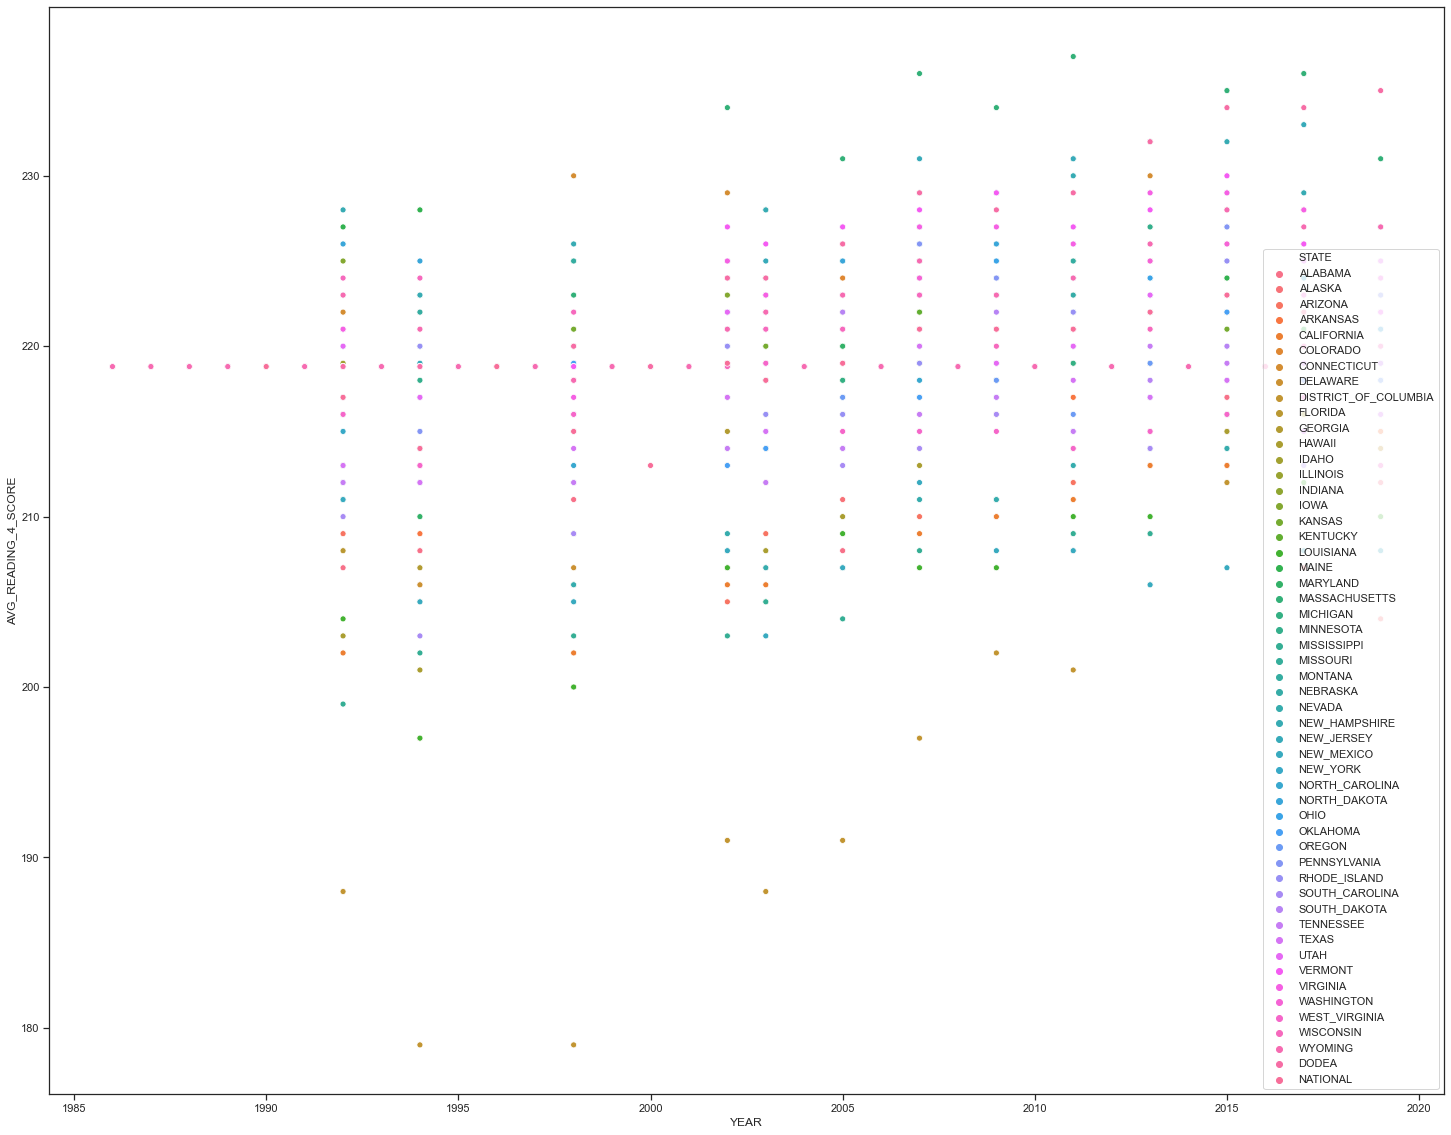

In [245]:
fig, ax = plt.subplots(figsize=(25,20)) 
sns.scatterplot(ax=ax, x='YEAR', y='AVG_READING_4_SCORE', data=data_new, hue='STATE')

# Обработка пропусков в категориальных данных

In [248]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))
print('END')

END


# График

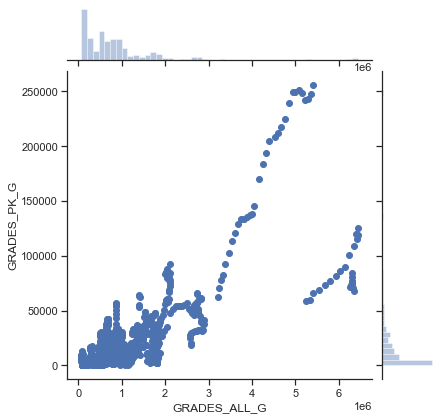

In [261]:
sns.jointplot(x='GRADES_ALL_G', y='GRADES_PK_G', data=data)